In [174]:
#importando pacotes

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np


In [131]:
df_countries = pd.read_csv("database/best-countries-to-live-in-2024.csv", encoding='ISO-8859-1') #branch da madu
df_country_statistics = pd.read_csv("database/Country statistics.csv", encoding='ISO-8859-1')  #branch do daniel
df_data = pd.read_csv("database/data.csv", encoding='ISO-8859-1') #gigante, vamos ver ela por último em grupo
df_men = pd.read_csv("database/men.csv", encoding='ISO-8859-1') #branch da maya
df_ufc_fighters = pd.read_csv("database/ufc-fighters-statistics.csv", encoding='ISO-8859-1') #branch do pedro
df_idh = pd.read_csv("database/human-development-index.csv", encoding='ISO-8859-1')
df_idh.head()


,Entity,Code,Year,Human Development Index
0,Afghanistan,AFG,1990,0.284
1,Afghanistan,AFG,1991,0.292
2,Afghanistan,AFG,1992,0.299
3,Afghanistan,AFG,1993,0.307
4,Afghanistan,AFG,1994,0.300


In [175]:
#verificando o conteúdo do dataset
df_countries.info()


countries_list = df_countries.country.unique().tolist() 
idh_list = df_idh.Entity.unique().tolist()

#verificando quais países do dataset countries não estão no dataset de idh
countries_not_in_list = []
for pais in idh_list:
    if(pais not in countries_list):
        countries_not_in_list.append(pais)

print(countries_not_in_list)

#limpeza do dataset best countries to live
new_df_countries = df_countries.drop(columns=['population_2024', 'population_growthRate', 'land_area', 'population_density', 'population_densityMi', 'share_borders'])

#verificando se a valores nulos (nan) no dataset
nan_in_df = new_df_countries.isnull().sum().sum()
 
# printing the number of values present in
# the whole dataframe
print('Number of NaN values present: ' + str(nan_in_df) + "\n")



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   population_2024        141 non-null    int64  
 1   population_growthRate  141 non-null    float64
 2   land_area              141 non-null    int64  
 3   country                141 non-null    object 
 4   region                 141 non-null    object 
 5   unMember               141 non-null    bool   
 6   population_density     141 non-null    float64
 7   population_densityMi   141 non-null    float64
 8   share_borders          129 non-null    object 
 9   Hdi2021                141 non-null    float64
 10  Hdi2020                141 non-null    float64
 11  WorldHappiness2022     141 non-null    float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 12.4+ KB
['Angola', 'Brunei', 'Cape Verde', 'Congo', "Cote d'Ivoire", 'Cuba', 'Guinea-Bissau', 'Guyana',

Verificado que o dataset de best countries to live não possui entradas nulas \o/
As colunas que fora dropadas são aquelas que não possuem objetivo relacionado ao nosso trabalho (podem ocorrer mudanças é claro).
Foi verificado que alguns países não estão inseridos no dataset de best countries to live, mas não cabe nessa instância retirar esses valores da tabela ou colocá-los, pois uma melhor métrica seria saber quais são os países de cada lutador da base de dados, e então fazer um filtro



Parte do Daniel:

Dataset original = 6171 linhas e 4 colunas

Retirei as linhas que tinham valores nulos da coluna "CODE" = 5841 linhas

Após isso deixei apenas os dados que são a partir do ano de 1997 = 4818

Perda de 1.353 linhas




In [133]:
#dataset human-devolopment-index
df_idh.head(10)

,Entity,Code,Year,Human Development Index
0,Afghanistan,AFG,1990,0.284
1,Afghanistan,AFG,1991,0.292
2,Afghanistan,AFG,1992,0.299
3,Afghanistan,AFG,1993,0.307
4,Afghanistan,AFG,1994,0.300
5,Afghanistan,AFG,1995,0.318
6,Afghanistan,AFG,1996,0.326
7,Afghanistan,AFG,1997,0.330
8,Afghanistan,AFG,1998,0.329
9,Afghanistan,AFG,1999,0.337


In [134]:
df_idh.shape

(6171, 4)

In [135]:
valores_nulos = df_idh.isnull().sum()
print(valores_nulos)

Entity                       0
Code                       330
Year                         0
Human Development Index      0
dtype: int64


In [136]:
linhas_com_nulos = df_idh[df_idh.isnull().any(axis=1)]
print(linhas_com_nulos)

                                      Entity Code  Year  \
162                       Arab States (UNDP)  NaN  1990   
163                       Arab States (UNDP)  NaN  1991   
164                       Arab States (UNDP)  NaN  1992   
165                       Arab States (UNDP)  NaN  1993   
166                       Arab States (UNDP)  NaN  1994   
167                       Arab States (UNDP)  NaN  1995   
168                       Arab States (UNDP)  NaN  1996   
169                       Arab States (UNDP)  NaN  1997   
170                       Arab States (UNDP)  NaN  1998   
171                       Arab States (UNDP)  NaN  1999   
172                       Arab States (UNDP)  NaN  2000   
173                       Arab States (UNDP)  NaN  2001   
174                       Arab States (UNDP)  NaN  2002   
175                       Arab States (UNDP)  NaN  2003   
176                       Arab States (UNDP)  NaN  2004   
177                       Arab States (UNDP)  NaN  2005 

In [137]:
pd.set_option('display.max_rows', None)
# Exibindo todas as linhas com valores nulos
print(linhas_com_nulos)

                                      Entity Code  Year  \
162                       Arab States (UNDP)  NaN  1990   
163                       Arab States (UNDP)  NaN  1991   
164                       Arab States (UNDP)  NaN  1992   
165                       Arab States (UNDP)  NaN  1993   
166                       Arab States (UNDP)  NaN  1994   
167                       Arab States (UNDP)  NaN  1995   
168                       Arab States (UNDP)  NaN  1996   
169                       Arab States (UNDP)  NaN  1997   
170                       Arab States (UNDP)  NaN  1998   
171                       Arab States (UNDP)  NaN  1999   
172                       Arab States (UNDP)  NaN  2000   
173                       Arab States (UNDP)  NaN  2001   
174                       Arab States (UNDP)  NaN  2002   
175                       Arab States (UNDP)  NaN  2003   
176                       Arab States (UNDP)  NaN  2004   
177                       Arab States (UNDP)  NaN  2005 

In [138]:
# Removendo todas as linhas com valores nulos do DataFrame original
df_idh.dropna(inplace=True)
# Verificando se as linhas com valores nulos foram removidas
print(df_idh)


                                Entity      Code  Year  \
0                          Afghanistan       AFG  1990   
1                          Afghanistan       AFG  1991   
2                          Afghanistan       AFG  1992   
3                          Afghanistan       AFG  1993   
4                          Afghanistan       AFG  1994   
5                          Afghanistan       AFG  1995   
6                          Afghanistan       AFG  1996   
7                          Afghanistan       AFG  1997   
8                          Afghanistan       AFG  1998   
9                          Afghanistan       AFG  1999   
10                         Afghanistan       AFG  2000   
11                         Afghanistan       AFG  2001   
12                         Afghanistan       AFG  2002   
13                         Afghanistan       AFG  2003   
14                         Afghanistan       AFG  2004   
15                         Afghanistan       AFG  2005   
16            

In [139]:
df_idh.shape

(5841, 4)

#limpeza feita pelo marcelo

In [140]:
df_pro_mma = pd.read_csv('database/pro_mma_fighters.csv', encoding='ISO-8859-1') #branch do marcelo 
# Verificar valores nulos em cada coluna
null_values = df_pro_mma.isnull().sum()

# Exibir colunas com valores nulos e suas respectivas quantidades
print(null_values)

df_pro_mma.head()

url                     0
fighter_name            3
nickname             1946
birth_date           1115
age                  1149
death_date           5114
location              512
country                22
height                  0
weight                  0
association           727
weight_class           30
wins                    0
wins_ko                 0
wins_submission         0
wins_decision           0
wins_other           4722
lossess                 0
losses_ko               0
losses_submission       0
losses_decision         0
losses_other         4722
dtype: int64


,url,fighter_name,nickname,birth_date,age,death_date,location,country,height,weight,...,wins,wins_ko,wins_submission,wins_decision,wins_other,lossess,losses_ko,losses_submission,losses_decision,losses_other
0,/fighter/Kharun-Atlangeriev-167431,Kharun Atlangeriev,Predator,05/10/1992,28.0,NaN,NaN,Russia,"5'10""",155 lbs,...,11,5,5,1,NaN,11,0,1,1,NaN
1,/fighter/Shojin-Miki-157565,Shojin Miki,Mini Margarito,NaN,NaN,NaN,"Honolulu, Hawaii",United States,"5'9""",125 lbs,...,6,2,4,0,NaN,6,2,0,5,NaN
2,/fighter/Ryan-Keenan-33827,Ryan Keenan,Who Dat?,15/06/1985,36.0,NaN,"Windermere, Florida",United States,"6'0""",155 lbs,...,6,3,3,0,NaN,6,1,1,0,NaN
3,/fighter/Dustin-Jacoby-73825,Dustin Jacoby,The Hanyak,04/04/1988,33.0,NaN,"Arenzville, Illinois",United States,"6'4""",205 lbs,...,14,9,1,4,NaN,14,1,2,2,NaN
4,/fighter/Richardson-Moreira-72825,Richardson Moreira,Rick Monstro,31/03/1984,37.0,NaN,"Campinas, Sao Paulo",Brazil,"6'2""",205 lbs,...,8,2,5,1,NaN,8,1,1,3,NaN


In [141]:
# Função para atribuir a classe de peso com base no peso
def definir_classe_peso(weight):
    weight = int(weight.split()[0])  # Pega apenas o número do peso
    if weight <= 115:
        return 'Strawweight'
    elif weight <= 125:
        return 'Flyweight'
    elif weight <= 135:
        return 'Bantamweight'
    elif weight <= 145:
        return 'Featherweight'
    elif weight <= 155:
        return 'Lightweight'
    elif weight <= 170:
        return 'Welterweight'
    elif weight <= 185:
        return 'Middleweight'
    elif weight <= 205:
        return 'Light Heavyweight'
    elif weight <= 265:
        return 'Heavyweight'
    else:
        return 'Super Heavyweight'

# Preencher valores nulos em weight_class com base em weight
df_pro_mma['weight_class'] = df_pro_mma['weight_class'].fillna(df_pro_mma['weight'].apply(definir_classe_peso))

# Verificar se há mais valores nulos na coluna weight_class
print(df_pro_mma['weight_class'].isnull().sum())



0


In [142]:
# Excluir as linhas que possuem valores nulos nas colunas 'fighter_name' ou 'country'
df_pro_mma_cleaned = df_pro_mma.dropna(subset=['fighter_name', 'country'])

# Verificar se as linhas com valores nulos nessas colunas foram removidas
print(df_pro_mma_cleaned.isnull().sum())

url                     0
fighter_name            0
nickname             1922
birth_date           1094
age                  1128
death_date           5089
location              490
country                 0
height                  0
weight                  0
association           706
weight_class            0
wins                    0
wins_ko                 0
wins_submission         0
wins_decision           0
wins_other           4700
lossess                 0
losses_ko               0
losses_submission       0
losses_decision         0
losses_other         4700
dtype: int64


A partir daqui começa o filtro das tabelas de IDH e best-coutries-to-live. Os páises da tabela vão ficar restritos as nacionalidades dos lutadores 

In [143]:
df_pro_mma_cleaned = df_pro_mma_cleaned[~df_pro_mma_cleaned["country"].isin(("INDIA", "Unknown"))]
df_pro_mma_cleaned = df_pro_mma_cleaned.dropna(how='any',subset=["country"])
lista_nacionalidades = df_pro_mma_cleaned.country.unique().tolist()
print(len(lista_nacionalidades))
print(lista_nacionalidades)

124
['Russia', 'United States', 'Brazil', 'Australia', 'France', 'Papua New Guinea', 'China', 'Japan', 'Italy', 'Malaysia', 'Moldova', 'Czech Republic', 'Philippines', 'Egypt', 'Denmark', 'Scotland', 'Israel', 'Canada', 'South Korea', 'Cambodia', 'Argentina', 'USA', 'England', 'Ireland', 'Myanmar', 'Indonesia', 'Iran', 'Kazakhstan', 'Mexico', 'Bulgaria', 'Finland', 'Poland', 'Liberia', 'Congo', 'Portugal', 'Chile', 'Ukraine', 'Austria', 'Switzerland', 'South Africa', 'Thailand', 'Germany', 'Sweden', 'Colombia', 'Costa Rica', 'Lithuania', 'Nigeria', 'New Zealand', 'Peru', 'Uruguay', 'Netherlands', 'Cameroon', 'Aruba', 'Slovakia', 'India', 'Singapore', 'Kyrgyzstan', 'Croatia', 'Panama', 'Azerbaijan', 'Tunisia', 'Spain', 'Cyprus', 'Belgium', 'Pakistan', 'Jamaica', 'Belarus', 'Bosnia and Herzegovina', 'Mongolia', 'Congo, The Democratic Republic of the', 'Romania', 'Venezuela', 'Georgia', 'Turkmenistan', 'Northern Ireland', 'Norway', 'Turkey', 'Suriname', 'Greece', 'Taiwan', 'Estonia', 'Lat

In [144]:
#filtrando as tabelas de idh e best countries
new_df_countries = new_df_countries[new_df_countries["country"].isin(lista_nacionalidades)]
df_idh = df_idh[df_idh["Entity"].isin(lista_nacionalidades)]

#também vamos limitar o intervalo de anos de idh - a partir de 1997
df_idh = df_idh[df_idh["Year"] >= 1997]

print("dimensão do dataset de best-countries pós filtro: " + str(new_df_countries.shape))
print("\ndimensão do dataset de idh pós filtro: " + str(df_idh.shape))

df_idh.head()

dimensão do dataset de best-countries pós filtro: (96, 6)

dimensão do dataset de idh pós filtro: (2775, 4)


,Entity,Code,Year,Human Development Index
7,Afghanistan,AFG,1997,0.330
8,Afghanistan,AFG,1998,0.329
9,Afghanistan,AFG,1999,0.337
10,Afghanistan,AFG,2000,0.340
11,Afghanistan,AFG,2001,0.344


In [145]:
#conferindo algumas coisas
l_idh = df_idh.Entity.unique().tolist()
print(l_idh)
l_countries = new_df_countries.country.unique().tolist()
print(sorted(l_countries))

for country in lista_nacionalidades:
    if(country not in l_idh):
        print(country)


['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh', 'Belarus', 'Belgium', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Congo', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Estonia', 'Finland', 'France', 'Georgia', 'Germany', 'Greece', 'Guinea-Bissau', 'Guyana', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kyrgyzstan', 'Latvia', 'Lebanon', 'Liberia', 'Lithuania', 'Malaysia', 'Mexico', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Nigeria', 'Norway', 'Pakistan', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Romania', 'Russia', 'Senegal',

In [146]:
#tentando concatenar todas as informações sobre os países
countries_region_list = []
for linha in new_df_countries.itertuples():
    countries_region_list.append([linha.country, linha.region])

print(countries_region_list)

[['India', 'Asia'], ['China', 'Asia'], ['United States', 'North America'], ['Indonesia', 'Asia'], ['Pakistan', 'Asia'], ['Nigeria', 'Africa'], ['Brazil', 'South America'], ['Bangladesh', 'Asia'], ['Russia', 'Europe'], ['Mexico', 'North America'], ['Japan', 'Asia'], ['Philippines', 'Asia'], ['Egypt', 'Africa'], ['Vietnam', 'Asia'], ['Turkey', 'Asia'], ['Germany', 'Europe'], ['Thailand', 'Asia'], ['France', 'Europe'], ['South Africa', 'Africa'], ['Italy', 'Europe'], ['Myanmar', 'Asia'], ['Colombia', 'South America'], ['South Korea', 'Asia'], ['Spain', 'Europe'], ['Iraq', 'Asia'], ['Argentina', 'South America'], ['Afghanistan', 'Asia'], ['Poland', 'Europe'], ['Canada', 'North America'], ['Morocco', 'Africa'], ['Ukraine', 'Europe'], ['Uzbekistan', 'Asia'], ['Peru', 'South America'], ['Malaysia', 'Asia'], ['Nepal', 'Asia'], ['Cameroon', 'Africa'], ['Australia', 'Oceania'], ['Kazakhstan', 'Asia'], ['Chile', 'South America'], ['Romania', 'Europe'], ['Ecuador', 'South America'], ['Senegal', 'A

In [161]:
region_column = []
for linha in df_idh.itertuples():
    if(linha.Entity not in l_countries):
        region_column.append(None)
    else:
        for countrie in countries_region_list:
            if countrie[0] == linha.Entity:
                #print(countrie[0] + "==" + linha.Entity)
                #print(countrie[1])
                region_column.append(countrie[1])

print(len(region_column))
print(region_column)



2775
['Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Asia', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', 'Europe', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South America', 'South A

In [162]:
print(len(region_column))  # Deve ser igual ao número de linhas de df_idh
print(df_idh.shape[0])  # Verifique o número de linhas de df_idh


df_region = pd.DataFrame({
    "Region": region_column
})



new_idh_df = pd.concat([df_idh.reset_index(drop=True), df_region.reset_index(drop=True)], axis=1)

new_idh_df.head(10)


2775
2775


,Entity,Code,Year,Human Development Index,Region
0,Afghanistan,AFG,1997,0.330,Asia
1,Afghanistan,AFG,1998,0.329,Asia
2,Afghanistan,AFG,1999,0.337,Asia
3,Afghanistan,AFG,2000,0.340,Asia
4,Afghanistan,AFG,2001,0.344,Asia
5,Afghanistan,AFG,2002,0.368,Asia
6,Afghanistan,AFG,2003,0.379,Asia
7,Afghanistan,AFG,2004,0.395,Asia
8,Afghanistan,AFG,2005,0.402,Asia
9,Afghanistan,AFG,2006,0.410,Asia


In [163]:
#gerando um arquivo csv com esse novo dataframe
new_idh_df.to_csv('idh_and_region.csv', index=False)

Como agora temos os dois datasets unidos, vamos agora fazer algumas análises interessantes
1ª Análise: Boxplot dos IDHs (identificar países com as melhores e piores qualidade de vida (outileirs))
2ª Análise: Dispersão dos IDHs por região

In [169]:
#Boxplot
#primeiro criamos um df auxiliar com as medias de idh de casa país
media_idh_paises= []
for country in l_idh:
    subset = new_idh_df[new_idh_df['Entity'] == country]
    media_idh_paises.append(subset['Human Development Index'].median())

df_aux = pd.DataFrame({
    "Country":l_idh,
    "IDH_median":media_idh_paises
})

print(df_aux.dtypes)

df_aux.head(10)

Country        object
IDH_median    float64
dtype: object


,Country,IDH_median
0,Afghanistan,0.4450
1,Albania,0.7590
2,Angola,0.5245
3,Argentina,0.8305
4,Armenia,0.7360
5,Australia,0.9230
6,Austria,0.9010
7,Azerbaijan,0.7260
8,Bangladesh,0.5525
9,Belarus,0.7870


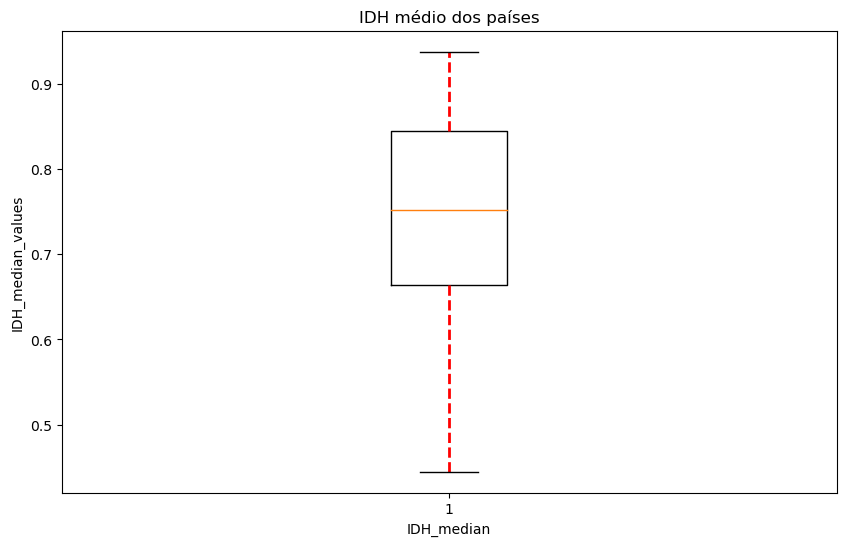

In [171]:
#plotando o idh médio
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(df_aux['IDH_median'], whiskerprops=dict(linestyle='--', linewidth=2, color='red'))
ax.set_title('IDH médio dos países')
ax.set_xlabel('IDH_median')
ax.set_ylabel('IDH_median_values')

plt.show()



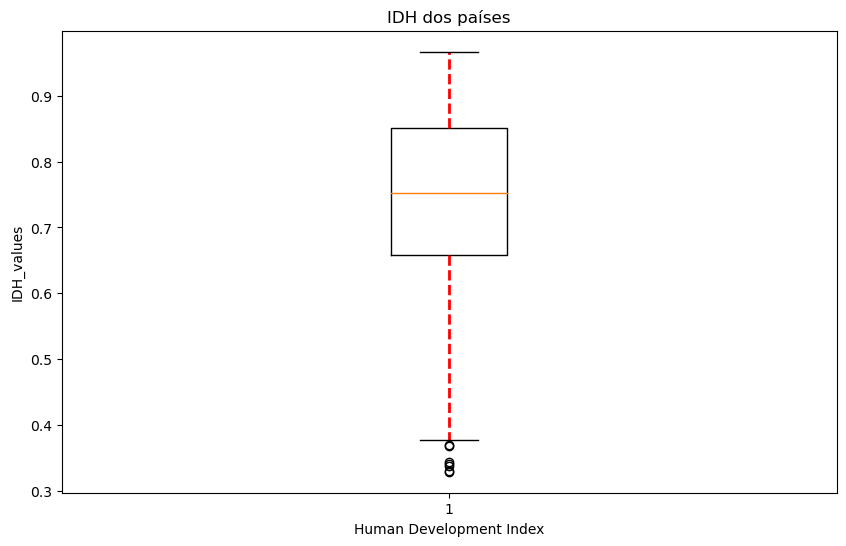

In [172]:
#plotando todos os idhs
fig, ax = plt.subplots(figsize=(10, 6))

ax.boxplot(new_idh_df['Human Development Index'], whiskerprops=dict(linestyle='--', linewidth=2, color='red'))
ax.set_title('IDH dos países')
ax.set_xlabel('Human Development Index')
ax.set_ylabel('IDH_values')

plt.show()


Começo da segunda análise

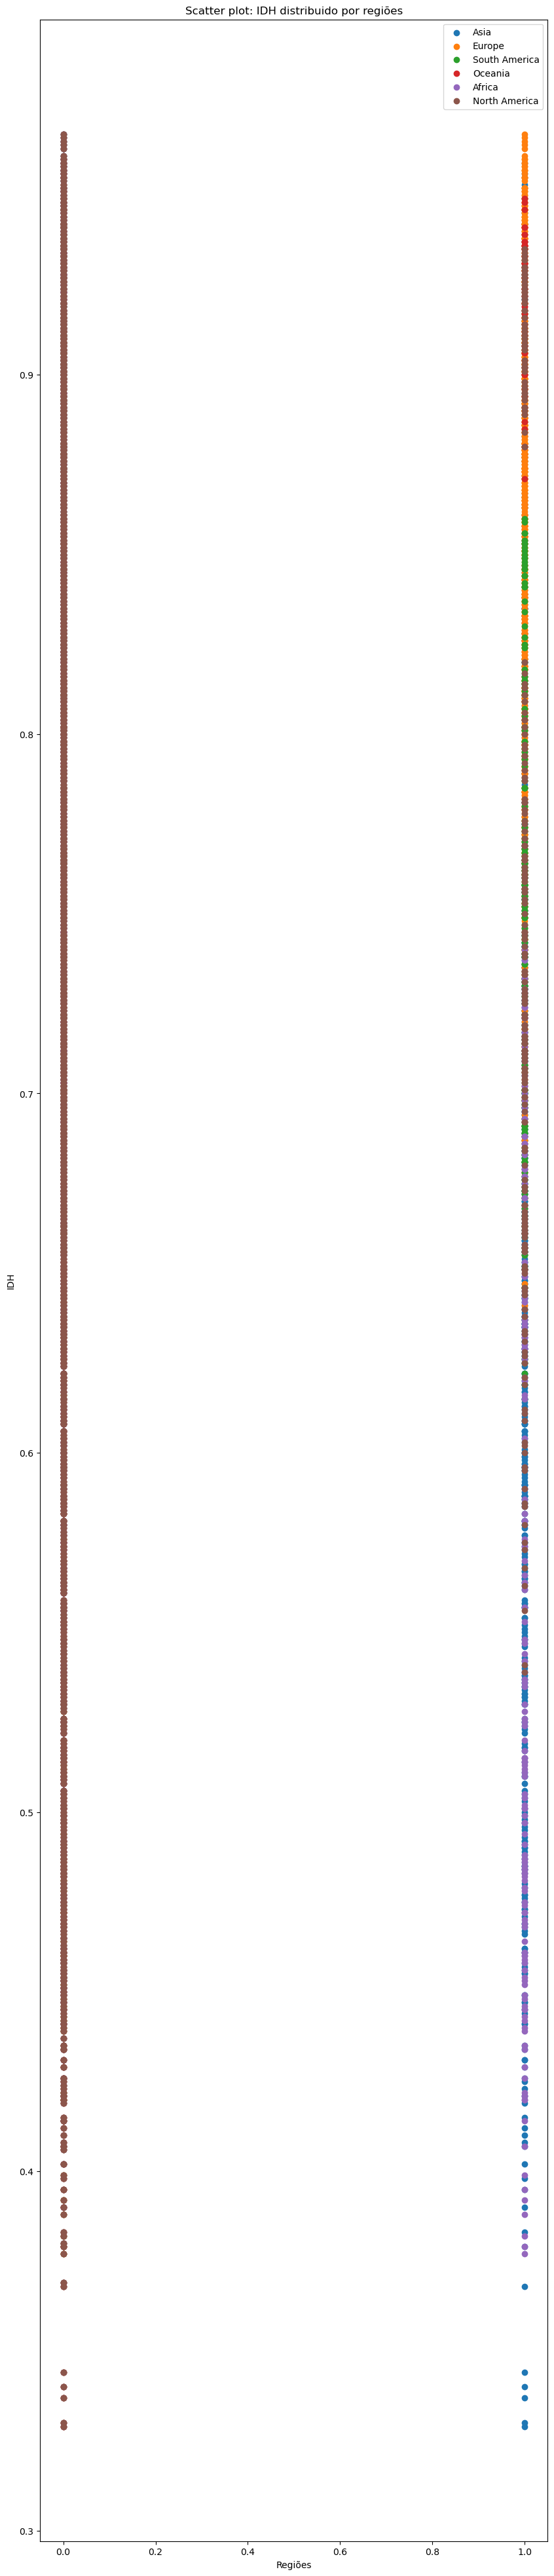

In [186]:
l_region = new_idh_df.Region.unique().tolist()

df_hot_encoded = pd.get_dummies(new_idh_df['Region'])

plt.figure(figsize=(10, 50))

for region in l_region:
    if(region):
        plt.scatter(df_hot_encoded[region], new_idh_df['Human Development Index'], label=region)
plt.title('Scatter plot: IDH distribuido por regiões')
plt.xlabel('Regiões')
plt.ylabel('IDH')
plt.legend()

plt.show()